<a href="https://colab.research.google.com/github/Galatonic-rebel/BDBN/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [11]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx

EDGE LIST

In [13]:
#From edge list to undirected networkx graph
G = nx.read_edgelist(path='/content/example_g_edge_list.txt', create_using=nx.Graph())
G.edges()

EdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '7'), ('1', '8'), ('2', '3'), ('3', '5'), ('7', '5'), ('8', '5'), ('8', '6')])

In [5]:
G.nodes()

NodeView(('1', '2', '3', '4', '7', '8', '5', '6'))

In [6]:
#From edge list to directed networkx graph
G = nx.read_edgelist(path = '/content/example_g_edge_list.txt', create_using = nx.DiGraph())
G.edges()

OutEdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '7'), ('1', '8'), ('2', '3'), ('3', '5'), ('5', '7'), ('5', '8'), ('6', '8')])

ADJACENCY LIST

In [7]:
#From Adjacency list to undirected networkx graph
G = nx.read_adjlist(path = '/content/Adjacency_list.txt', create_using= nx.Graph())
G.edges()

EdgeView([('A:', 'B'), ('A:', 'C'), ('A:', 'D'), ('B', 'E:'), ('C', 'F:'), ('B:', 'A'), ('B:', 'E'), ('A', 'C:'), ('A', 'D:'), ('C:', 'F')])

In [9]:
#From Adjacency list to directed networkx graph
G = nx.read_adjlist(path = '/content/Adjacency_list.txt', create_using = nx.DiGraph())
G.edges()

OutEdgeView([('A:', 'B'), ('A:', 'C'), ('A:', 'D'), ('B:', 'A'), ('B:', 'E'), ('C:', 'A'), ('C:', 'F'), ('D:', 'A'), ('E:', 'B'), ('F:', 'C')])

FROM PANDAS DATAFRAME

In [26]:
#Edge list as a dataframe object
df_edge_list = pd.read_csv('/content/example_g_edge_list.txt', sep = ' ', names = ['Source', 'Target'], on_bad_lines='warn')
df_edge_list
df_edge_list.head()

<ipython-input-26-1f2f0d9f92bc>:2: ParserWarning: Skipping line 7: expected 2 fields, saw 3

  df_edge_list = pd.read_csv('/content/example_g_edge_list.txt', sep = ' ', names = ['Source', 'Target'], on_bad_lines='warn')


,Source,Target
0,1,2
1,1,3
2,1,4
3,1,7
4,1,8


In [21]:
#Edge list dataframe -> Undirected networkx object
G = nx.from_pandas_edgelist(df_edge_list, source="Source", target="Target", create_using= nx.Graph())
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 7), (1, 8), (2, 3), (7, 5), (8, 5), (8, 6)])

In [22]:
#-> Directed networkx object
G = nx.from_pandas_edgelist(df_edge_list, source="Source", target="Target", create_using=nx.DiGraph())
G.edges()

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 7), (1, 8), (2, 3), (5, 7), (5, 8), (6, 8)])

In [29]:
#Adj mat as a dataframe object
df_adj_mat = pd.read_csv('example_mat.txt', delimiter=' ', names=range(7))
df_adj_mat

,0,1,2,3,4,5,6
0,NaN,0,1,1,1,0,0
1,NaN,1,0,0,0,1,0
2,NaN,1,0,0,0,0,1
3,NaN,1,0,0,0,0,0
4,NaN,0,1,0,0,0,0
5,NaN,0,0,1,0,0,0


In [30]:
#Adj mat dataframe -> Undirected networkx objects
G = nx.from_pandas_adjacency(df_adj_mat, create_using=nx.Graph())
G.edges()

EdgeView([(0, 0), (0, 2), (0, 3), (0, 4), (0, 1), (0, 5), (1, 1), (1, 5), (1, 2), (1, 3), (2, 4), (3, 5)])

In [31]:
#Adj mat dataframe -> Directed networkx objects
G = nx.from_pandas_adjacency(df_adj_mat, create_using=nx.DiGraph())
G.edges()

OutEdgeView([(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 5), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 2), (5, 0), (5, 3)])

In [32]:
G = nx.Graph()
G.add_node(1)
G.add_node(1.2)
G.add_node("IITM")
G.add_node(np.exp)
G.nodes()

NodeView((1, 1.2, 'IITM', <ufunc 'exp'>))

In [38]:
G = nx.Graph()
G.add_node(1, dtype='int')
G.add_node(1.2, dtype='float')
G.add_node('IITM', dtype='string')
G.add_node(np.exp, dtype='function')
G.nodes[np.exp]

{'dtype': 'function'}

In [40]:
G.add_edge(1,1.2, weight=1)
G.add_edge(1.2,'IITM', weight=2)
G.add_edge(np.exp, 'IITM', weight=3)
G.edges[(1.2,'IITM')]

{'weight': 2}

In [42]:
#Undirected graph
edge_list=[(1,2), (1,2), (1,1), (2,3), (3,3), (3,2)]
G1 = nx.Graph()
G1.add_edges_from(edge_list)
print("For undirected graph:", G1.edges())

#Directed graph
G2 = nx.DiGraph()
G2.add_edges_from(edge_list)
print("For directed graph:", G2.edges())

#Multi graph
G3 = nx.MultiGraph()
G3.add_edges_from(edge_list)
print("For multi graph:", G3.edges())

#Multi directed graph
G4 = nx.MultiDiGraph()
G4.add_edges_from(edge_list)
print("For multi directed graph:", G4.edges())

For undirected graph: [(1, 2), (1, 1), (2, 3), (3, 3)]
For directed graph: [(1, 2), (1, 1), (2, 3), (3, 3), (3, 2)]
For multi graph: [(1, 2), (1, 2), (1, 1), (2, 3), (2, 3), (3, 3)]
For multi directed graph: [(1, 2), (1, 2), (1, 1), (2, 3), (3, 3), (3, 2)]


**Drawing Networkx Graphs**

Text(0.5, 1.0, 'Kamada Kawai')

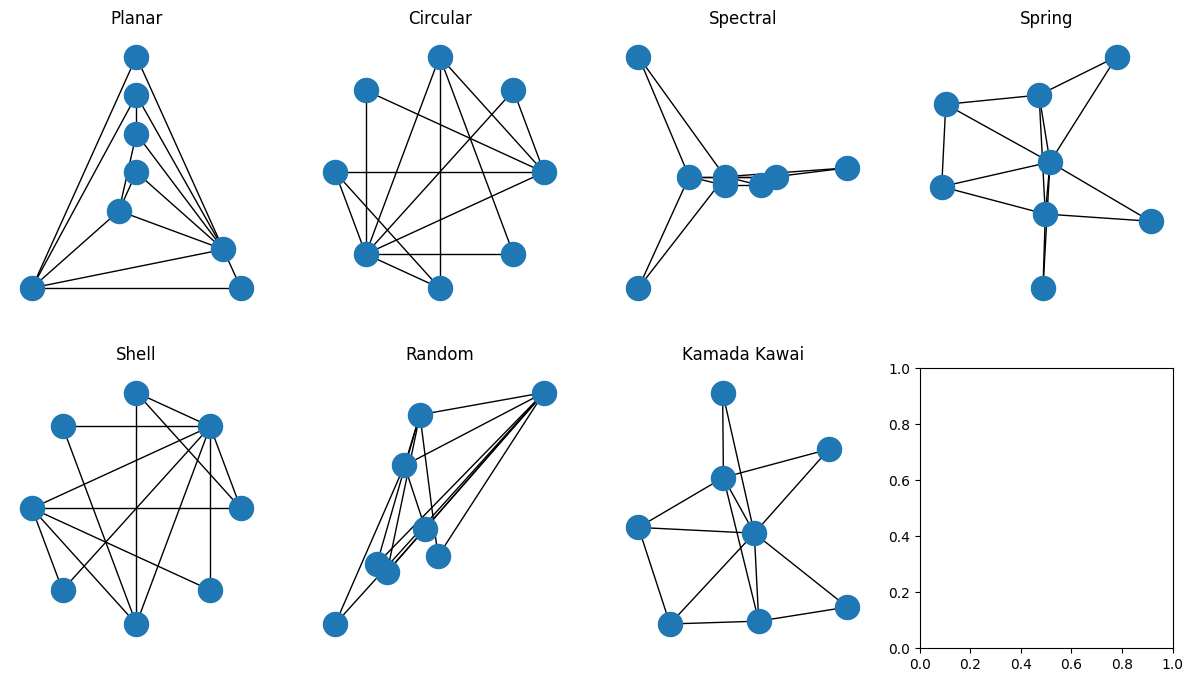

In [43]:
#Plotting graphs using different layouts
G = nx.Graph()
edge_list= [(1,2),(1,3),(1,4),(1,7),(1,8),(2,8),(3,5),(3,6),(3,8),(4,8),(5,7),(5,8),(6,8),(7,8)]
G.add_edges_from(edge_list)

fig,ax = plt.subplots(2,4,figsize=(15,8))
ax=ax.flatten()
nx.draw_planar(G, ax=ax[0])
ax[0].set_title('Planar')
nx.draw_circular(G, ax=ax[1])
ax[1].set_title('Circular')
nx.draw_spectral(G, ax=ax[2])
ax[2].set_title('Spectral')
nx.draw_spring(G, ax=ax[3])
ax[3].set_title('Spring')
nx.draw_shell(G, ax=ax[4])
ax[4].set_title('Shell')
nx.draw_random(G, ax=ax[5])
ax[5].set_title('Random')
nx.draw_kamada_kawai(G, ax=ax[6])
ax[6].set_title('Kamada Kawai')

**Let's focus on aesthetics!**

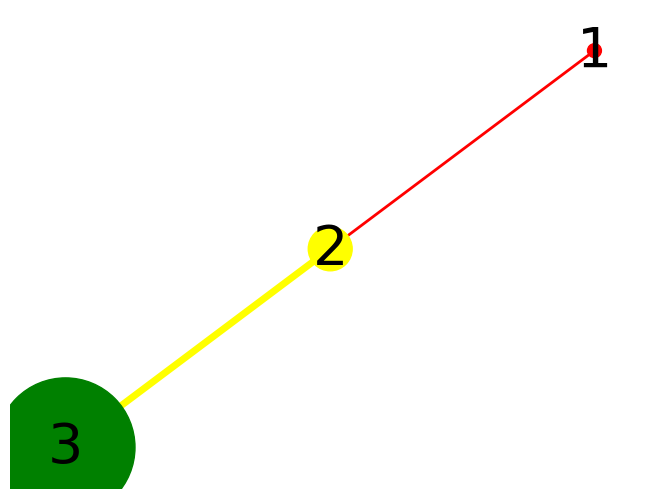

In [44]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3)])
nx.draw(G, with_labels= True, node_color=['red', 'yellow', 'green'], node_size=[100,1000,10000]
        , edge_color=['red','yellow'], width=[2,5], font_size=40)

#PLOTTING NETWORK MAP OF AN INDIAN AIRLINE ROUTES
Source:https://openflights.org/data.html

In [46]:
#Reading the file into a pandas dataframe
ind_air = pd.read_csv('/content/Indian_airports.csv')
ind_air.head()

,id,name,city,country,iata,icao,lat,lon,alt,offset,daylight,timezone,type,source
0,2994,Sardar Vallabhbhai Patel International Airport,Ahmedabad,India,AMD,VAAH,23.077200,72.634697,189.0,5.5,N,Asia/Calcutta,airport,OurAirports
1,2995,Akola Airport,Akola,India,AKD,VAAK,20.698999,77.058601,999.0,5.5,N,Asia/Calcutta,airport,OurAirports
2,2996,Aurangabad Airport,Aurangabad,India,IXU,VAAU,19.862700,75.398102,1911.0,5.5,N,Asia/Calcutta,airport,OurAirports
3,2997,Chhatrapati Shivaji International Airport,Mumbai,India,BOM,VABB,19.088699,72.867897,39.0,5.5,N,Asia/Calcutta,airport,OurAirports
4,2998,Bilaspur Airport,Bilaspur,India,PAB,VABI,21.988400,82.111000,899.0,5.5,N,Asia/Calcutta,airport,OurAirports


In [48]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=ind_air)

https://docs.google.com/spreadsheets/d/1YTNrPhIgv3wIif5psgyAsKz60VHkM7xVn54m2ywxJbU#gid=0


In [47]:
air_G = nx.Graph()
for i in range(len(ind_air)):
  air_now = ind_air.loc[i]
  air_G.add_node(air_now['id'], name=air_now['name'], city=air_now['city'],
                 lat=air_now['lat'], long=air_now['lon'])

In [56]:
#printing a random node
print(air_G.nodes[2999])

{'name': 'Bhuj Airport', 'city': 'Bhuj', 'lat': 23.2877998352, 'long': 69.6701965332}


In [57]:
ind_route = pd.read_csv('/content/Indian_airline_route.csv')
ind_route.head()

,airline,airline_id,airport1,airport2,stops,equipment
0,6E,2850,2994,3131,0,320
1,6E,2850,2994,2997,0,320
2,6E,2850,2994,3043,0,320
3,6E,2850,2994,3093,0,320
4,6E,2850,2994,3007,0,320


In [58]:
for i in range(len(ind_route)):
  airl_now = ind_route.iloc[i]
  air_G.add_edge(airl_now['airport1'],airl_now['airport2'],airline=airl_now['airline'],
                 airline_id=airl_now['airline_id'])

In [59]:
print(air_G.edges[(2994,3043)])

{'airline': 'G8', 'airline_id': 2575}


In [63]:
air_G.degree()

DegreeView({2994: 8, 2995: 0, 2996: 2, 2997: 44, 2998: 0, 2999: 1, 3000: 1, 3001: 2, 3002: 3, 3003: 1, 3004: 0, 3005: 0, 3006: 0, 3007: 6, 3008: 6, 3009: 2, 3010: 1, 3011: 0, 3012: 2, 3013: 0, 3014: 0, 3015: 7, 3016: 0, 3017: 10, 3018: 2, 3019: 1, 3020: 7, 3021: 0, 3022: 2, 3023: 2, 3037: 0, 3038: 3, 3039: 3, 3040: 3, 3041: 0, 3042: 6, 3043: 24, 3044: 0, 3045: 0, 3048: 0, 3049: 0, 3050: 5, 3051: 0, 3052: 0, 3053: 0, 3054: 0, 3055: 3, 3056: 0, 3057: 4, 3058: 0, 3059: 0, 3060: 0, 3061: 5, 3062: 0, 3063: 4, 3064: 0, 3065: 0, 3066: 7, 3067: 0, 3079: 3, 3080: 2, 3081: 3, 3082: 0, 3083: 0, 3084: 5, 3085: 1, 3086: 0, 3087: 0, 3088: 0, 3089: 3, 3090: 0, 3091: 0, 3092: 2, 3093: 42, 3094: 1, 3095: 0, 3096: 0, 3097: 2, 3098: 5, 3099: 0, 3100: 4, 3101: 1, 3102: 0, 3103: 1, 3104: 3, 3105: 5, 3106: 0, 3107: 0, 3108: 0, 3109: 0, 3111: 0, 3112: 6, 3113: 0, 3130: 1, 3131: 23, 3132: 0, 3133: 0, 3134: 1, 3135: 5, 3136: 8, 3137: 6, 3138: 0, 3139: 0, 3140: 0, 3141: 0, 3142: 1, 3143: 3, 3144: 15, 3145: 0, 3

In [64]:
#removing nodes with zeros degrees
for location, degree in list (air_G.degree()):
  if degree == 0:
    air_G.remove_node(location)

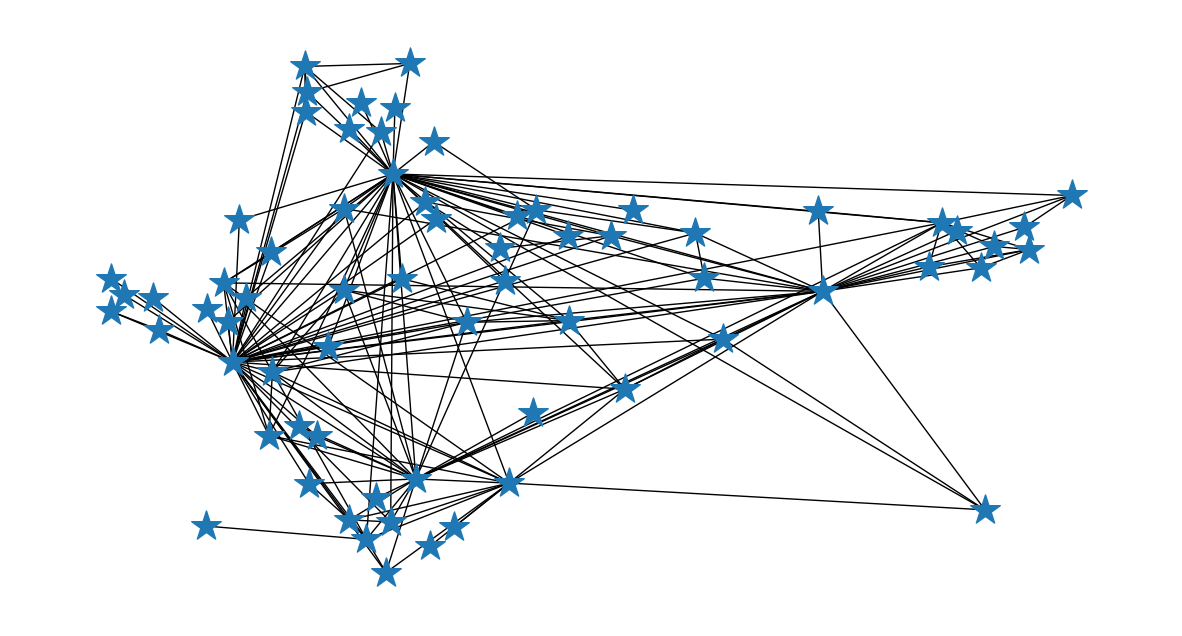

In [71]:
#Plotting the graph
position = {node:[air_G.nodes[node]['long'], air_G.nodes[node]['lat']] for node in air_G.nodes()}
plt.ax =plt.subplots(1,1, figsize=(15,8))
nx.draw(air_G, position, node_shape='*', node_size=500)

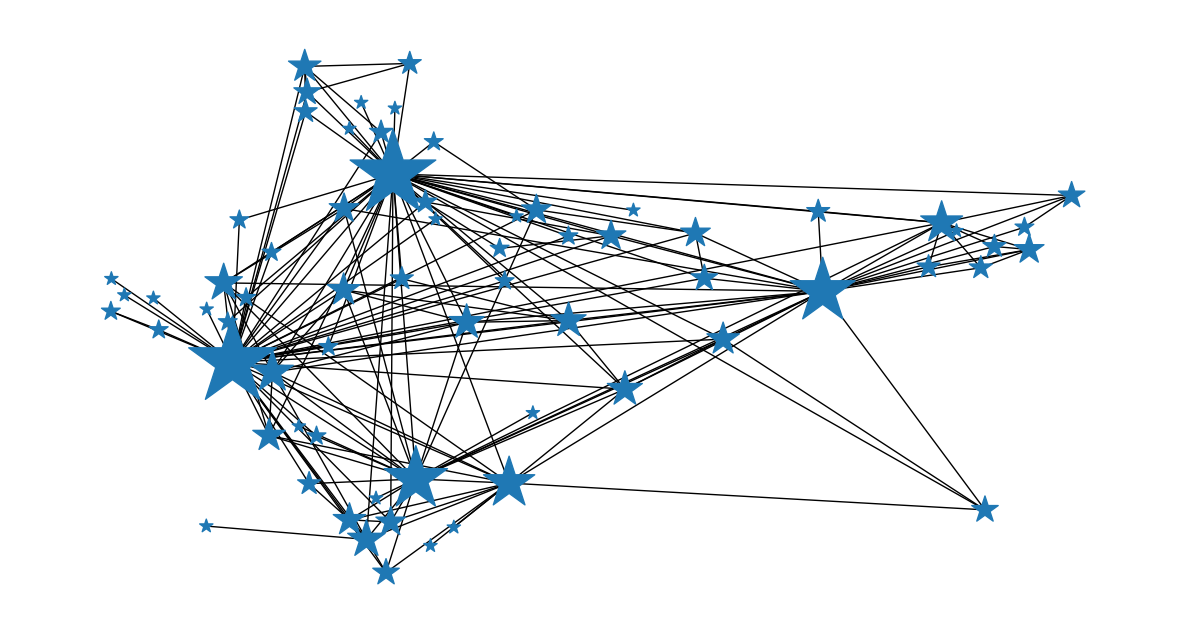

In [72]:
#Size of nodes proportional to degree centrality
node_size=[j*100 for i,j in list(air_G.degree())]
fig, ax = plt.subplots(1,1, figsize=(15,8))
nx.draw(air_G, position, node_shape='*', node_size=node_size, ax=ax, width=1)

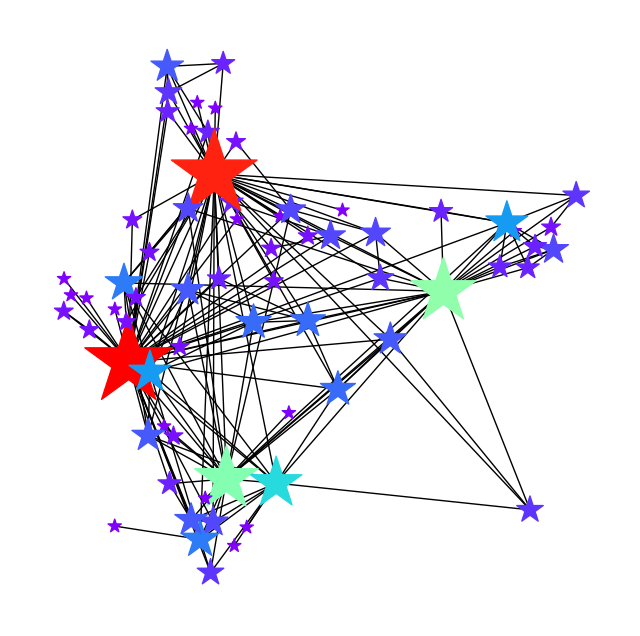

In [74]:
#Adding colors based on degree centrality
node_color=[j for i,j in list (air_G.degree)]
fig,ax = plt.subplots(1,1,figsize=(8,8))
nx.draw(air_G, position, node_shape='*', node_size=node_size,node_color=node_color
        ,cmap='rainbow', ax=ax,width=1)

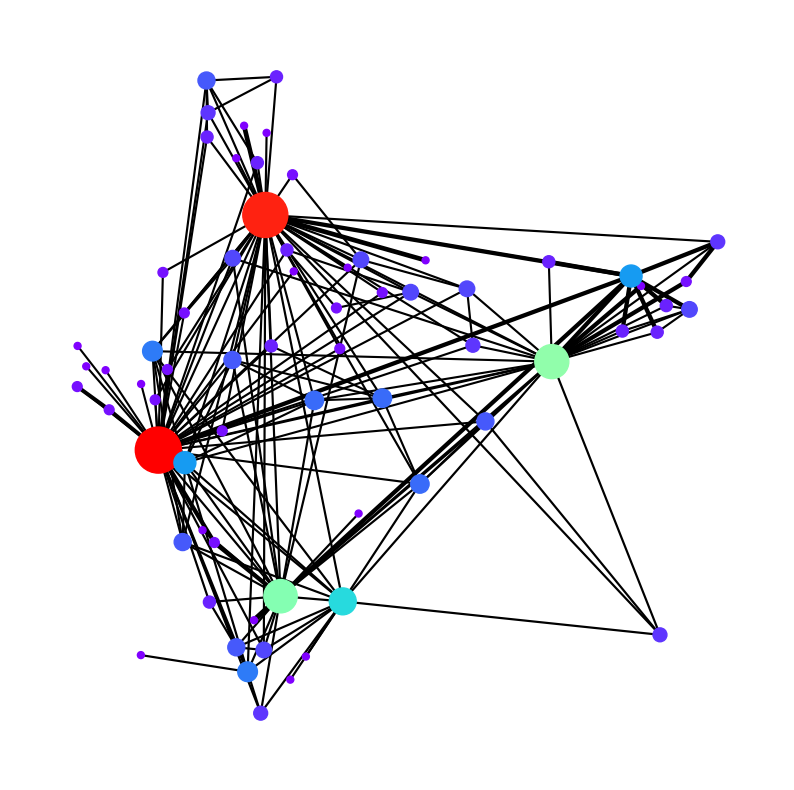

In [82]:
#width of edges based on edge betweeness centrality
edge_width = [j/2000 for i,j in list(nx.edge_betweenness_centrality(air_G, normalized=0))]
fig,ax= plt.subplots(1,1,figsize=(10,10))
nx.draw(air_G, position, node_shape='.', node_color=node_color,
        node_size=node_size, cmap='rainbow', ax=ax, width=edge_width)